# Python Dictionaries Implementation

*Implement dictionaries with different data structures (red-black trees and hash tables) from scratch and analyze their performance in different scenarios*

### Exam Notes

About the presentation:

- It should be 15-20 minutes, with additional 5 minutes of questions (either during the talk or afterwards)

- Your presentation should focus on the algorithmic part of whatever you chose

- Questions can also be about the related parts in the course (if your algorithm uses, e.g., a binary search tree, we might ask you about properties and applications of binary search trees)

## 1.0 First Implementation: Hash Tables

Summary: we have a key, we send it through an hash function that it is going to hashing it really fast and then map the output into a memory address where we will store our data. 

### Time Complexity:
 - Insert: O(1)
 - Lookup: O(1)
 - Delete: O(1)
 - Search: O(1)
 

### How to Implement Hash Tables
1. Use a fast Hash Function. Eg. SHA-256 takes a very long time to compute the hash and it is overly complex.
2. Implement Linked-List to solve Hash Collisions



## 2.0 Second Implementation: Red Black Trees

[Red Black Trees Explanation](https://medium.com/basecs/painting-nodes-black-with-red-black-trees-60eacb2be9a5)

> A red-black tree is a type of self-balancing binary search tree, very similar to other self-balancing trees, such as AVL trees. However, a red-black tree is a structure that has to adhere to a very strict set of rules in order to make sure that it stays balanced; the rules of a red-black tree are exactly what enables it to maintain a guaranteed logarithmic time complexity.

1. Every single node in the tree must be either red or black.
2. The root node of the tree must always be black.
3. Two red nodes can never appear consecutively, one after another; a red node must always be preceded by a black node (it must have a black parent node), and a red node must always have black children nodes.
4. Every branch path — the path from a root node to an empty (null) leaf node — must pass through the exact same number of black nodes. A branch path from the root to an empty leaf node is also known as an unsuccessful search path, since it represents the path we would take if we were to search for a node that didn’t exist within the tree.

[*Why Red Black Trees?*](https://stackoverflow.com/questions/13852870/red-black-tree-over-avl-tree)

> Both red-black trees and AVL trees are the most commonly used balanced binary search trees and they support insertion, deletion and look-up in guaranteed O(logN) time. However, there are following points of comparison between the two:

> AVL trees are more rigidly balanced and hence provide faster look-ups. Thus for a look-up intensive task use an AVL tree.
For an insert intensive tasks, use a Red-Black tree.
AVL trees store the balance factor at each node. This takes O(N) extra space. However, if we know that the keys that will be inserted in the tree will always be greater than zero, we can use the sign bit of the keys to store the colour information of a red-black tree. Thus, in such cases red-black tree takes no extra space.
What are the application of Red black tree?
Red-black trees are more general purpose. They do relatively well on add, remove, and look-up but AVL trees have faster look-ups at the cost of slower add/remove.

### Notes:
 1. it’s easiest to start off by always inserting a red node, and then recoloring and rotation as necessary, afterwards
 
 
 
2. https://stackoverflow.com/questions/17279805/how-do-i-implement-a-hashtable-using-a-binary-search-tree

> No, we do not need to calculate an index or use a hashing function. If we store the key,value pairs in the nodes of the bst, then its just a matter of traversing the tree by comparing the keys. This also gives you the added advantage of no collisions since the keys are unique.

> You could use a hashing function and hash the key and then traverse the tree based on that value but this can lead to collisions if you are not careful with the hash function and then you would have to maintain some sort of chaining.

> Whether to use the key or the hashed value of the key depends on the size of the key. If the key size is large, it makes sense to hash it to a smaller size for faster comparison.

In [1]:
from HashTable import NaiveHashTable, DefaultHashTable, MD5HashTable, SHA256HashTable, JenkinsHashTable
from MapRBTree import MapRBTree

# Analyze Performance

In [2]:
import pandas as pd
import numpy as np
import statistics

In [3]:
def insert_keys(hashtable, n=10000):
    for i in range(n):
        hashtable.add(str(i), i)
        
def get_values(hashtable, n=10000):
    for i in range(n):
        hashtable.get(str(i))
        
def delete_values(hashtable, n=10000):
    for i in range(n):
        hashtable.delete(str(i), testing=True) 

In [4]:
def get_hashtable(kind, size):
    hashtables = {
        'Naive': NaiveHashTable(size),
        'Default': DefaultHashTable(size),
        'MD5': MD5HashTable(size),
        'SHA256': SHA256HashTable(size),
        'Jenkins': JenkinsHashTable(size)
    }
        
    return hashtables[kind]

## Hash Table Size Change Analysis

In [5]:
def get_results(kind, size_array):
    res_insert = []
    res_get = []
    res_del = []
    for size in size_array:
        print(kind, size)
        hashtable = get_hashtable(kind, size)
        insert = %timeit -o -n 100 insert_keys(hashtable, n=10000)
        get = %timeit -o -n 100 get_values(hashtable, n=1000)
        delete = %timeit -o -n 100 delete_values(hashtable, n=1000)
        res_insert.append(insert)
        res_get.append(get)
        res_del.append(delete)
    return res_insert, res_get, res_del

In [6]:
hashtable_kind = ['Naive', 'Default', 'MD5', 'SHA256', 'Jenkins']
size_array = [10, 50, 250, 500, 1000, 2000, 5000, 15000, 25000, 100000]


results = []
for kind in hashtable_kind:
    results.append((kind, get_results(kind, size_array)))

Naive 10
26.4 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.55 ms ± 372 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.48 ms ± 478 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 50
26.2 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.51 ms ± 87.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.51 ms ± 76.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 250
25.3 ms ± 617 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.3 ms ± 65.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.34 ms ± 78.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 500
27.9 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.07 ms ± 571 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.46 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 1000
26.6 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.48 ms ± 59 µs per loop

3.58 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
SHA256 15000
32.5 ms ± 669 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.69 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.58 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
SHA256 25000
30.6 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.5 ms ± 97.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.6 ms ± 57.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
SHA256 100000
31.4 ms ± 939 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.64 ms ± 74.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.5 ms ± 89.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Jenkins 10
75 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
12 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.3 ms ± 99.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Jenkins 50
75.1 ms ± 1.09 

### Format Results

In [7]:
#insert
insert_res= []
for i in [res[1][0] for res in results]: 
    insert_res.append([statistics.mean(time_res.timings) for time_res in i])
    
insert_df = pd.DataFrame(insert_res).T
insert_df.columns=[res[0] for res in results]
insert_df.index = size_array

In [8]:
insert_df

,Naive,Default,MD5,SHA256,Jenkins
10,0.026356,0.016924,0.030615,0.029499,0.074966
50,0.026208,0.013058,0.030930,0.030296,0.075141
250,0.025273,0.013769,0.034732,0.030739,0.081957
500,0.027910,0.015828,0.032642,0.031196,0.079185
1000,0.026583,0.014779,0.035087,0.031464,0.080593
2000,0.026311,0.013515,0.031676,0.030394,0.079405
5000,0.026781,0.015516,0.030097,0.031728,0.077606
15000,0.028311,0.014557,0.029311,0.032538,0.070780
25000,0.026850,0.014846,0.029001,0.030567,0.072017
100000,0.026656,0.015011,0.028992,0.031433,0.072377


In [9]:
#insert_df.to_csv('./Results/insert_size_change-3.csv')

In [10]:
#get
get_res = []
for i in [res[1][1] for res in results]: 
    get_res.append([statistics.mean(time_res.timings) for time_res in i])
    
get_df = pd.DataFrame(get_res).T
get_df.columns=[res[0] for res in results]
get_df.index = size_array

In [11]:
get_df

,Naive,Default,MD5,SHA256,Jenkins
10,0.007545,0.007092,0.009521,0.007988,0.012014
50,0.004506,0.002674,0.004641,0.004326,0.008551
250,0.004297,0.001997,0.003823,0.003827,0.008189
500,0.005069,0.001838,0.004213,0.003547,0.008249
1000,0.004484,0.001819,0.003765,0.003546,0.008178
2000,0.005481,0.001800,0.003723,0.003660,0.008209
5000,0.004500,0.001756,0.003259,0.003464,0.009308
15000,0.004578,0.001731,0.003275,0.003685,0.006853
25000,0.004461,0.001965,0.003799,0.003495,0.007209
100000,0.004490,0.001923,0.003369,0.003636,0.007657


In [12]:
#get_df.to_csv('./Results/get_size_change-3.csv')

In [13]:
#del
del_res = []
for i in [res[1][2] for res in results]: 
    del_res.append([statistics.mean(time_res.timings) for time_res in i])
    
del_df = pd.DataFrame(del_res).T
del_df.columns=[res[0] for res in results]
del_df.index = size_array

In [14]:
del_df

,Naive,Default,MD5,SHA256,Jenkins
10,0.007480,0.006507,0.008958,0.008220,0.012310
50,0.004512,0.002610,0.004609,0.004445,0.008455
250,0.004345,0.001835,0.004015,0.003861,0.008302
500,0.004458,0.002043,0.004735,0.003619,0.008144
1000,0.004497,0.001789,0.003744,0.003719,0.008240
2000,0.004852,0.002328,0.003867,0.003583,0.008501
5000,0.004518,0.001758,0.003271,0.003582,0.010980
15000,0.004513,0.001744,0.003187,0.003580,0.007054
25000,0.004500,0.001776,0.003334,0.003602,0.007468
100000,0.004723,0.001959,0.003234,0.003499,0.007722


In [15]:
#del_df.to_csv('./Results/del_size_change-3.csv')

### Visualize Results

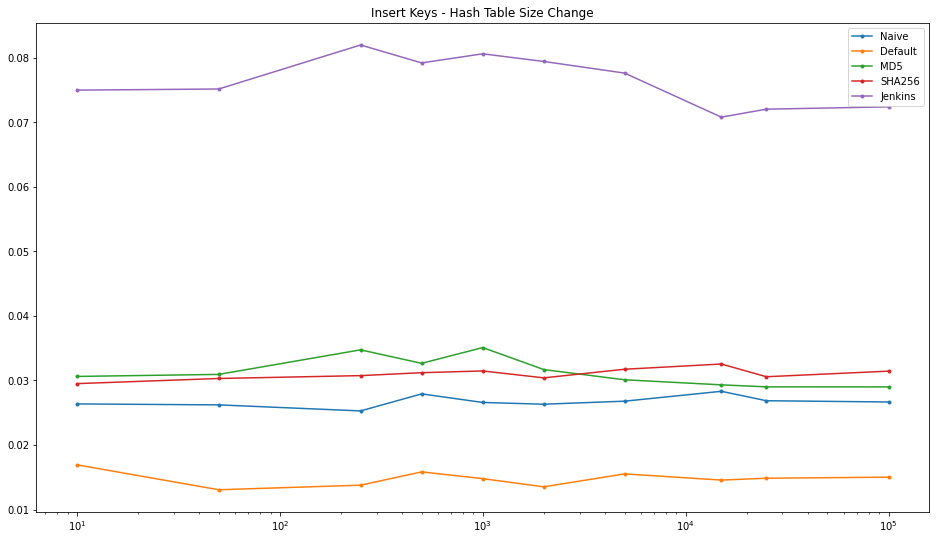

In [16]:
ax = insert_df.plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Insert Keys - Hash Table Size Change');

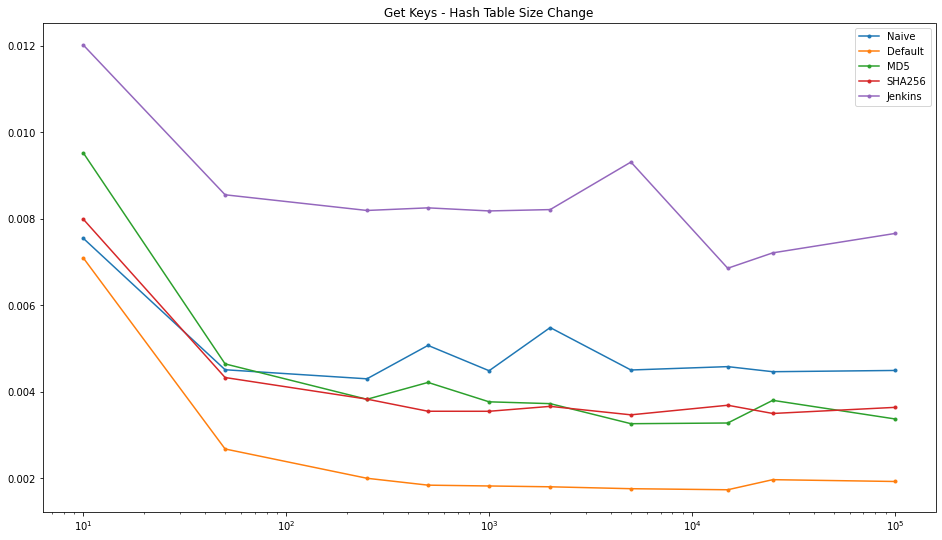

In [17]:
ax = get_df.plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Get Keys - Hash Table Size Change');

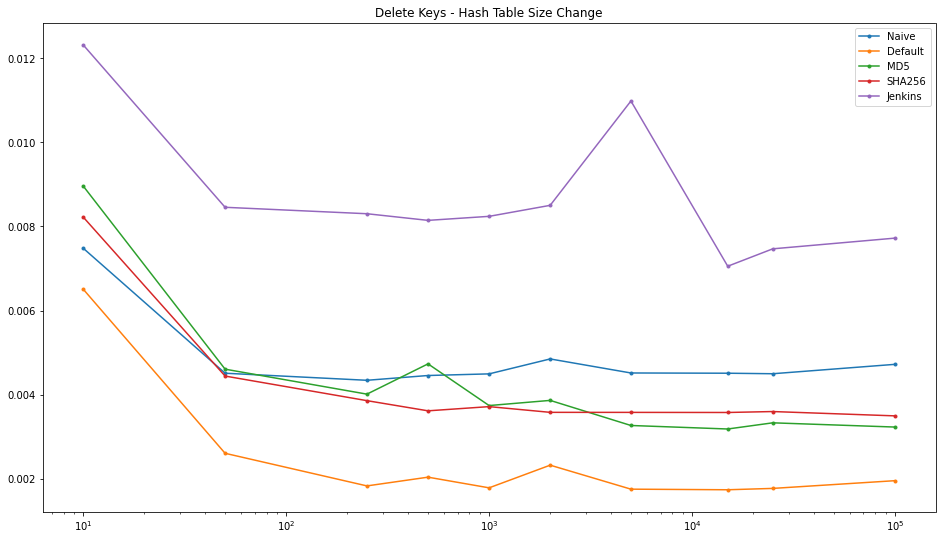

In [18]:
ax = del_df.plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Delete Keys - Hash Table Size Change');

## N. Keys Analsysis

### Hash Tables

In [19]:
def get_results(kind, n_keys_insert, n_keys_get):
    res_insert = []
    res_get = []
    del_get = []
    for i in range(len(n_keys_insert)):
        print(kind, n_keys_insert[i], n_keys_get[i], n_keys_del[i])
        hashtable = get_hashtable(kind, size)
        insert = %timeit -o -n 100 insert_keys(hashtable, n=n_keys_insert[i])
        get = %timeit -o -n 100 get_values(hashtable, n=n_keys_get[i])
        delete = %timeit -o -n 100 delete_values(hashtable, n=n_keys_del[i])
        res_insert.append(insert)
        res_get.append(get)
        del_get.append(delete)
    return res_insert, res_get, del_get

In [24]:
size = 250
n_keys_insert = [10, 100, 250, 500, 1000, 2500, 5000, 10000, 50000]
n_keys_get = [10, 100, 250, 500, 1000, 2500, 5000, 10000, 50000]
n_keys_del = [10, 100, 250, 500, 1000, 2500, 5000, 10000, 50000]
hashtables = ['Naive', 'Default', 'MD5', 'SHA256', 'Jenkins']

In [21]:
results = []
for i, kind in enumerate(hashtables):
    results.append((kind, get_results(kind, n_keys_insert, n_keys_get)))

Naive 10 10
29 µs ± 6.98 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.4 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
25.6 µs ± 3.84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 100 100
223 µs ± 78.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
198 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
203 µs ± 7.55 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 250 250
427 µs ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
541 µs ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
532 µs ± 7.38 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 500 500
887 µs ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.24 ms ± 69.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.26 ms ± 34.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Naive 1000 1000
1.79 ms ± 34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.37 

597 µs ± 32.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
603 µs ± 7.43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
601 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Jenkins 250 250
1.5 ms ± 40.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.57 ms ± 42.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.57 ms ± 32.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Jenkins 500 500
3.03 ms ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.32 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.82 ms ± 637 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Jenkins 1000 1000
6.73 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.81 ms ± 515 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.59 ms ± 562 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Jenkins 2500 2500
16.6 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.2 m

### Red Black Tree

In [44]:
def get_results_rb_tree(n_keys_insert, n_keys_get):
    res_insert = []
    res_get = []
    res_del = []
    for i in range(len(n_keys_insert)):
        print(n_keys_insert[i], n_keys_get[i])
        insert = %timeit -o -n 100 insert_keys(num_rbt, n=n_keys_insert[i])
        get = %timeit -o -n 100 get_values(num_rbt, n=n_keys_get[i])
        delete = %timeit -o -n 100 delete_values(num_rbt, n=n_keys_del[i])
        res_insert.append(insert)
        res_get.append(get)
        res_del.append(delete)
    return res_insert, res_get, res_del

In [45]:
num_rbt = MapRBTree()
results = [('Red Black Tree', get_results_rb_tree(n_keys_insert, n_keys_get))]

10 10
20.7 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
36.8 µs ± 3.62 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.53 µs ± 48.2 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
100 100
311 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
526 µs ± 36.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
37.7 µs ± 3.34 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
250 250
944 µs ± 80.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.69 ms ± 93 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
103 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
500 500
2.05 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.58 ms ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
188 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1000 1000
4.06 ms ± 80.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.57 ms ± 53.8 µs per loop (mean

### Format Results

In [22]:
#insert
insert_res= []
for i in [res[1][0] for res in results]: 
    insert_res.append([statistics.mean(time_res.timings) for time_res in i])
    
insert_key_change_df = pd.DataFrame(insert_res).T
insert_key_change_df.columns=[res[0] for res in results]
insert_key_change_df.index = n_keys_insert

In [46]:
#insert
insert_res= []
for i in [res[1][0] for res in results]: 
    insert_res.append([statistics.mean(time_res.timings) for time_res in i])
    
insert_key_change_rb_df = pd.DataFrame(insert_res).T
insert_key_change_rb_df.columns=[res[0] for res in results]
insert_key_change_rb_df.index = n_keys_insert

In [47]:
insert_key_change_df = insert_key_change_df.join(insert_key_change_rb_df)

In [49]:
#insert_key_change_df.to_csv('./Results/insert_key_change_df-3.csv')

In [29]:
insert_key_change_df = pd.read_csv('./Results/insert_key_change_df-3.csv')
insert_key_change_df = insert_key_change_df[insert_key_change_df.columns[1:]]
insert_key_change_df.index = n_keys_insert

In [30]:
insert_key_change_df

,Naive,Default,MD5,SHA256,Jenkins,Red Black Tree
10,0.000029,0.000018,0.000034,0.000034,0.000073,0.000021
100,0.000223,0.000121,0.000229,0.000248,0.000597,0.000311
250,0.000427,0.000247,0.000566,0.000606,0.001504,0.000944
500,0.000887,0.000516,0.001142,0.001211,0.003027,0.002055
1000,0.001790,0.000989,0.002299,0.002473,0.006730,0.004063
2500,0.005279,0.002374,0.005758,0.006134,0.016557,0.011584
5000,0.010399,0.004702,0.011952,0.012226,0.034621,0.025189
10000,0.020998,0.009515,0.023805,0.024717,0.066642,0.054326
50000,0.123649,0.049042,0.117938,0.124850,0.359410,0.328259


In [25]:
#get
get_res = []
for i in [res[1][1] for res in results]: 
    get_res.append([statistics.mean(time_res.timings) for time_res in i])
    
get_key_change_df = pd.DataFrame(get_res).T
get_key_change_df.columns=[res[0] for res in results]
get_key_change_df.index = n_keys_get

In [52]:
#get
get_res = []
for i in [res[1][1] for res in results]: 
    get_res.append([statistics.mean(time_res.timings) for time_res in i])
    
get_key_change_rb_df = pd.DataFrame(get_res).T
get_key_change_rb_df.columns=[res[0] for res in results]
get_key_change_rb_df.index = n_keys_get

In [53]:
get_key_change_df = get_key_change_df.join(get_key_change_rb_df)

In [55]:
#get_key_change_df.to_csv('./Results/get_key_change_df-3.csv')

In [27]:
get_key_change_df = pd.read_csv('./Results/get_key_change_df-3.csv')
get_key_change_df = get_key_change_df[get_key_change_df.columns[1:]]
get_key_change_df.index = n_keys_get

In [28]:
get_key_change_df

,Naive,Default,MD5,SHA256,Jenkins,Red Black Tree
10,0.000025,0.000014,0.000029,0.000034,0.000059,0.000037
100,0.000198,0.000112,0.000256,0.000272,0.000603,0.000526
250,0.000541,0.000290,0.000643,0.000698,0.001575,0.001692
500,0.001242,0.000611,0.001335,0.001415,0.003317,0.003585
1000,0.003371,0.001351,0.002791,0.002942,0.007813,0.007568
2500,0.009759,0.004054,0.008320,0.008152,0.019219,0.021979
5000,0.031242,0.010411,0.017580,0.018415,0.040930,0.049146
10000,0.114959,0.028455,0.043820,0.044982,0.093924,0.106919
50000,2.025010,0.557206,0.635710,0.643698,1.026220,0.632390


In [36]:
#del
del_res = []
for i in [res[1][2] for res in results]: 
    del_res.append([statistics.mean(time_res.timings) for time_res in i])
    
del_key_change_df = pd.DataFrame(del_res).T
del_key_change_df.columns=[res[0] for res in results]
del_key_change_df.index = n_keys_get

In [61]:
#del
del_res = []
for i in [res[1][2] for res in results]: 
    del_res.append([statistics.mean(time_res.timings) for time_res in i])
    
del_key_change_rb_df = pd.DataFrame(del_res).T
del_key_change_rb_df.columns=[res[0] for res in results]
del_key_change_rb_df.index = n_keys_get

In [62]:
del_key_change_df = del_key_change_df.join(del_key_change_rb_df)

In [64]:
#del_key_change_df.to_csv('./Results/del_key_change_df-3.csv')

In [25]:
del_key_change_df = pd.read_csv('./Results/del_key_change_df-3.csv')
del_key_change_df = del_key_change_df[del_key_change_df.columns[1:]]
del_key_change_df.index = n_keys_get

In [26]:
del_key_change_df

,Naive,Default,MD5,SHA256,Jenkins,Red Black Tree
10,0.000026,0.000013,0.000026,0.000035,0.000058,0.000005
100,0.000203,0.000115,0.000264,0.000278,0.000601,0.000038
250,0.000532,0.000293,0.000669,0.000707,0.001571,0.000103
500,0.001263,0.000617,0.001369,0.001456,0.003815,0.000188
1000,0.003879,0.001365,0.002857,0.003308,0.007593,0.000413
2500,0.009881,0.004144,0.008206,0.008558,0.018794,0.000957
5000,0.032371,0.010350,0.018154,0.018885,0.038649,0.001883
10000,0.123771,0.029447,0.045558,0.046856,0.094819,0.003787
50000,1.799949,0.564503,0.638707,0.827162,0.884025,0.019550


### Visualize Results

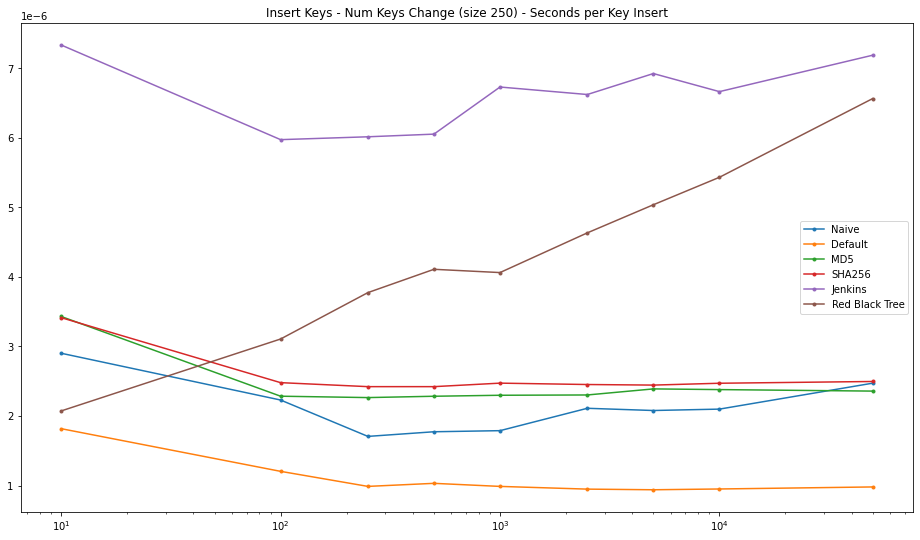

In [67]:
ax = insert_key_change_df.div(insert_key_change_df.index.to_series(), axis=0).plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Insert Keys - Num Keys Change (size 250) - Seconds per Key Insert');

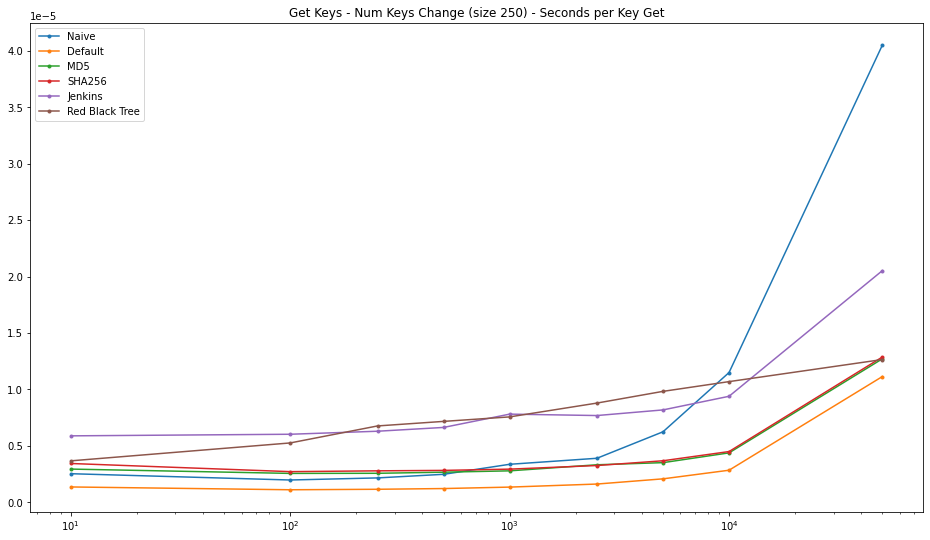

In [68]:
ax = get_key_change_df.div(get_key_change_df.index.to_series(), axis=0).plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Get Keys - Num Keys Change (size 250) - Seconds per Key Get');

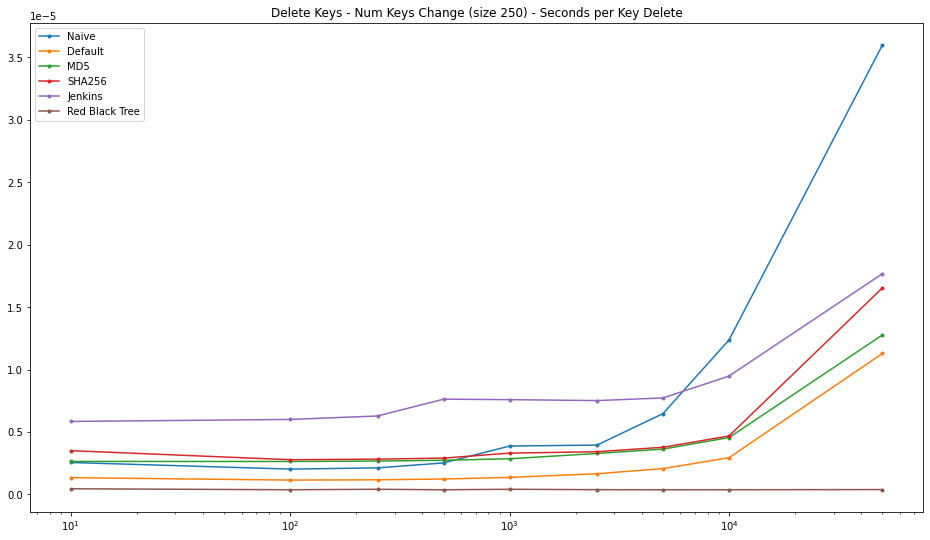

In [69]:
ax = del_key_change_df.div(del_key_change_df.index.to_series(), axis=0).plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Delete Keys - Num Keys Change (size 250) - Seconds per Key Delete');

### Log Comparison for Red Black Tree

In [31]:
from utils import plot_multi

In [37]:
temp_df = pd.DataFrame(np.log(insert_key_change_df.index))
temp_df['b'] = insert_key_change_df.div(insert_key_change_df.index.to_series(), axis=0)[['Red Black Tree']].values
temp_df['c'] = get_key_change_df.div(get_key_change_df.index.to_series(), axis=0)[['Red Black Tree']].values
#temp_df['d'] = del_key_change_df.div(del_key_change_df.index.to_series(), axis=0)[['Red Black Tree']].values
temp_df.index = get_key_change_df.index
temp_df.columns = ['log(keys)', 'Red Black Tree (insert)', 'Red Black Tree (get)']

In [38]:
temp_df

,log(keys),Red Black Tree (insert),Red Black Tree (get)
10,2.302585,0.000002,0.000004
100,4.605170,0.000003,0.000005
250,5.521461,0.000004,0.000007
500,6.214608,0.000004,0.000007
1000,6.907755,0.000004,0.000008
2500,7.824046,0.000005,0.000009
5000,8.517193,0.000005,0.000010
10000,9.210340,0.000005,0.000011
50000,10.819778,0.000007,0.000013


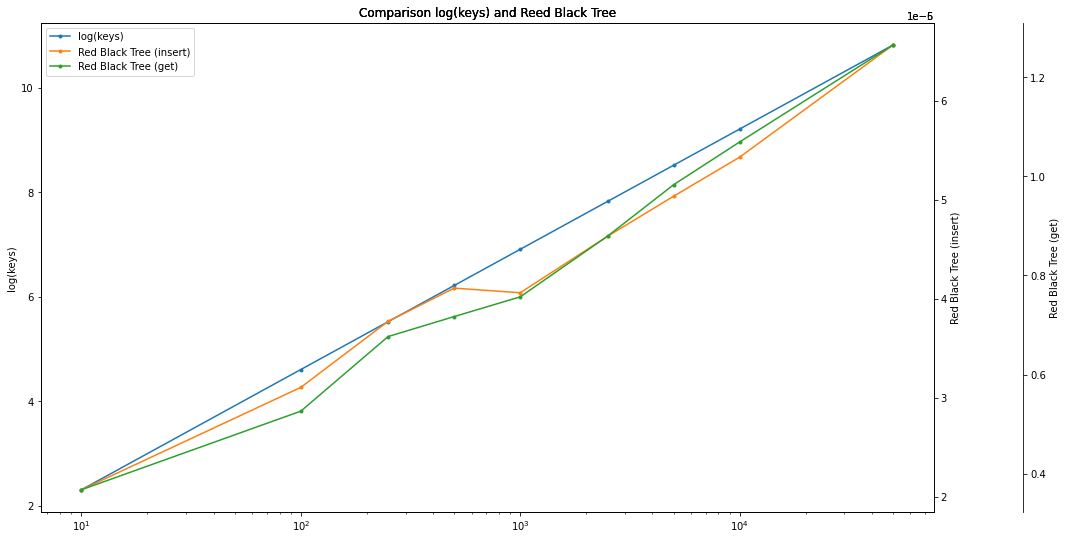

In [39]:
ax = plot_multi(temp_df, figsize=(16, 9), style='.-', title='Comparison log(keys) and Reed Black Tree');
ax.set_xscale('log');

# Improving Performance

*Not working anymore, got previously executed on Hash Table with python dict instead of python list for hash collisions*

In [1]:
from NHashTable import DefaultNHashTable

In [2]:
def get_results_default_n(n_keys_insert, n_keys_get):
    res_insert = []
    res_get = []
    for i in range(len(n_keys_insert)):
        print(n_keys_insert[i], n_keys_get[i])
        insert = %timeit -o -n 100 insert_keys(default_nht, n=n_keys_insert[i])
        get = %timeit -o -n 100 get_values(default_nht, n=n_keys_get[i])
        res_insert.append(insert)
        res_get.append(get)
    return res_insert, res_get

In [3]:
def insert_keys(hashtable, n=10000):
    for i in range(n):
        hashtable.append(str(i), i)
        
def get_values(hashtable, n=10000):
    for i in range(n):
        hashtable.get(str(i))

In [4]:
default_nht = DefaultNHashTable(250)
n_keys_insert = [10, 100, 250, 500, 1000, 2500, 5000, 10000, 50000]
n_keys_get = [10, 100, 250, 500, 1000, 2500, 5000, 10000, 50000]

In [ ]:
results = [('Default N', get_results_default_n(n_keys_insert, n_keys_get))]

In [15]:
#insert
insert_res= []
for i in [res[1][0] for res in results]: 
    insert_res.append([statistics.mean(time_res.timings) for time_res in i])
    
insert_key_change_def_n = pd.DataFrame(insert_res).T
insert_key_change_def_n.columns=[res[0] for res in results]
insert_key_change_def_n.index = n_keys_insert

insert_key_change_df = insert_key_change_df.join(insert_key_change_def_n)

In [16]:
insert_key_change_df

,Naive,Default,MD5,SHA256,Jenkins,Red Black Tree,Default N
10,0.000020,0.000017,0.000033,0.000034,0.000069,0.000038,0.000011
100,0.000190,0.000121,0.000236,0.000254,0.000572,0.000364,0.000107
250,0.000470,0.000324,0.000591,0.000627,0.001437,0.001012,0.000208
500,0.000887,0.000536,0.001188,0.001246,0.002897,0.002132,0.000439
1000,0.001879,0.001019,0.002401,0.002489,0.005822,0.004641,0.000972
2500,0.004521,0.002344,0.005917,0.006222,0.014848,0.012229,0.002172
5000,0.009122,0.004618,0.011789,0.012314,0.029844,0.034278,0.004517
10000,0.018440,0.009316,0.023679,0.024666,0.059776,0.064066,0.009828
50000,0.102916,0.046893,0.122330,0.124382,0.304135,0.373617,0.048352


In [17]:
#get
get_res = []
for i in [res[1][1] for res in results]: 
    get_res.append([statistics.mean(time_res.timings) for time_res in i])
    
get_key_change_def_n = pd.DataFrame(get_res).T
get_key_change_def_n.columns=[res[0] for res in results]
get_key_change_def_n.index = n_keys_get

get_key_change_df = get_key_change_df.join(get_key_change_def_n)

In [18]:
get_key_change_df

,Naive,Default,MD5,SHA256,Jenkins,Red Black Tree,Default N
10,0.000025,0.000015,0.000032,0.000033,0.000058,0.000039,0.000010
100,0.000234,0.000110,0.000273,0.000282,0.000586,0.000601,0.000087
250,0.000521,0.000282,0.000677,0.000702,0.001511,0.001772,0.000190
500,0.001239,0.000601,0.001370,0.001402,0.003031,0.003666,0.000414
1000,0.003137,0.001317,0.002849,0.002933,0.006256,0.008068,0.000804
2500,0.008270,0.003888,0.007886,0.007973,0.016457,0.030322,0.001972
5000,0.025720,0.009741,0.017701,0.017976,0.034745,0.056033,0.004483
10000,0.095544,0.026674,0.043108,0.043350,0.076871,0.117713,0.009037
50000,1.403718,0.461325,0.569312,0.560277,0.728794,0.727403,0.046993


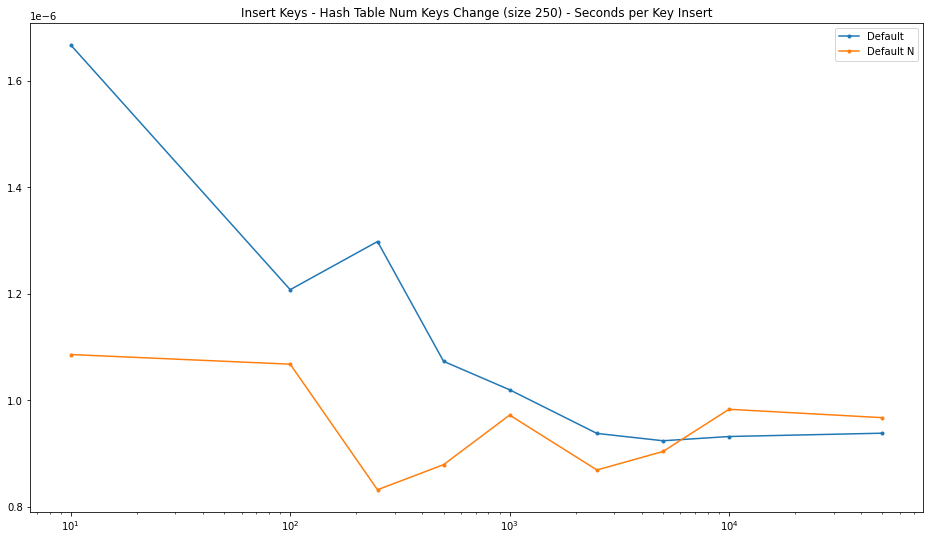

In [19]:
columns = ['Default', 'Default N']

ax = insert_key_change_df.div(insert_key_change_df.index.to_series(), axis=0)[columns].plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Insert Keys - Hash Table Num Keys Change (size 250) - Seconds per Key Insert');

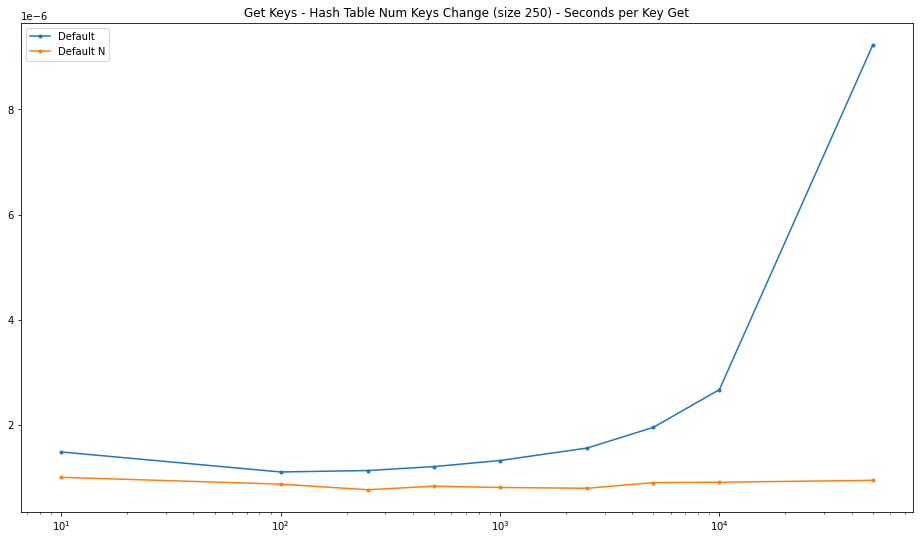

In [20]:
ax = get_key_change_df.div(get_key_change_df.index.to_series(), axis=0)[columns].plot(figsize=(16,9), style='.-');
ax.set_xscale('log');
ax.set_title('Get Keys - Hash Table Num Keys Change (size 250) - Seconds per Key Get');